In [3]:
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.nn.functional import relu
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

Change the path below to where your "fer2013" folder is

Example: If fer2013 is located in the Downloads folder, the path looks something like below

In [4]:
dataset_root_folder = r'C:\Users\nguye\Downloads'

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.FER2013(root=dataset_root_folder, split='train', transform=transform)
testset = torchvision.datasets.FER2013(root=dataset_root_folder, split='test', transform=transform)
train_loader = DataLoader(trainset)
test_loader = DataLoader(testset)

In [6]:
train_iter = iter(train_loader)

Feature batch shape: torch.Size([1, 1, 48, 48])
Labels batch shape: torch.Size([1])


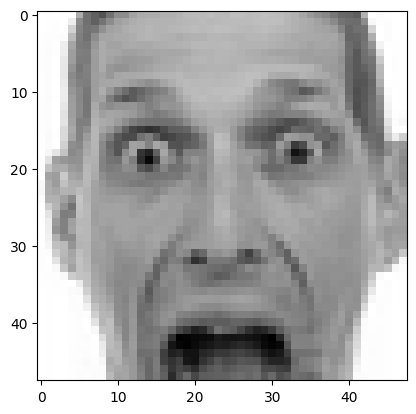

Label: Fear


In [16]:
images, labels = next(train_iter)
labels_map = {
    0:"Angry",
    1:"Disgust",
    2:"Fear",
    3:"Happy", 
    4:"Sad", 
    5:"Surprise", 
    6:"Neutral"
}
print(f"Feature batch shape: {images.size()}")
print(f"Labels batch shape: {labels.size()}")
img = images[0].squeeze()
label = labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[int(label)]}")

In [17]:
class FER_Classifer(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3,3)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)),
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64*(48-6)*(48-6), 7),

        )
 
    def forward(self,x):
        return self.model(x)


In [18]:
import torch.optim as optim

clf = FER_Classifer()
criteria = nn.CrossEntropyLoss()
opt = optim.SGD(clf.parameters(), lr=0.0002)

In [20]:
for epoch in range(10):
    running_loss = 0
    for index, data in enumerate(train_loader, 0):
        images, labels = data
        opt.zero_grad()

        outputs = clf(images)
        loss = criteria(outputs, labels)
        loss.backward()
        opt.step()

        running_loss+= loss.item()
        if index % 2000 == 1999:  
            print(f'[{epoch + 1}, {index + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0



[1,  2000] loss: 1.777
[1,  4000] loss: 1.735
[1,  6000] loss: 1.736
[1,  8000] loss: 1.719
[1, 10000] loss: 1.719
[1, 12000] loss: 1.715
[1, 14000] loss: 1.684
[1, 16000] loss: 1.661
[1, 18000] loss: 1.705
[1, 20000] loss: 1.654
[1, 22000] loss: 1.656
[1, 24000] loss: 1.633
[1, 26000] loss: 1.654
[1, 28000] loss: 1.612
[2,  2000] loss: 1.636
[2,  4000] loss: 1.621
[2,  6000] loss: 1.635
[2,  8000] loss: 1.635
[2, 10000] loss: 1.641
[2, 12000] loss: 1.647
[2, 14000] loss: 1.616
[2, 16000] loss: 1.597
[2, 18000] loss: 1.642
[2, 20000] loss: 1.595
[2, 22000] loss: 1.596
[2, 24000] loss: 1.574
[2, 26000] loss: 1.601
[2, 28000] loss: 1.554
[3,  2000] loss: 1.582
[3,  4000] loss: 1.569
[3,  6000] loss: 1.583
[3,  8000] loss: 1.583
[3, 10000] loss: 1.593
[3, 12000] loss: 1.596
[3, 14000] loss: 1.563
[3, 16000] loss: 1.546
[3, 18000] loss: 1.590
[3, 20000] loss: 1.542
[3, 22000] loss: 1.548
[3, 24000] loss: 1.522
[3, 26000] loss: 1.548
[3, 28000] loss: 1.497
[4,  2000] loss: 1.531
[4,  4000] 

In [23]:
test_iter = iter(test_loader)


In [28]:
list(enumerate(test_loader))

(tensor([[[ 0.9922,  0.9922,  0.9922,  ..., -0.8745, -1.0000,  0.2627],
          [ 0.9922,  0.9922,  0.9922,  ..., -0.8667, -1.0000, -0.0431],
          [ 0.9922,  0.9922,  0.9922,  ..., -0.7961, -1.0000, -0.1059],
          ...,
          [-0.4824, -0.3255, -0.2235,  ...,  1.0000,  0.9765,  0.9922],
          [-0.3412, -0.2784, -0.2784,  ...,  0.8510,  1.0000,  1.0000],
          [-0.2706, -0.2941, -0.3333,  ..., -0.6706,  0.0118,  0.4118]]]),
 None)